In [7]:
!git clone https://github.com/SparklePh/KMITL-Workshop-yolo-car-counting

Cloning into 'KMITL-Workshop-yolo-car-counting'...
remote: Enumerating objects: 2718, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 2718 (delta 9), reused 26 (delta 5), pack-reused 2688 (from 2)
Receiving objects: 100% (2718/2718), 198.31 MiB | 33.90 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Updating files: 100% (6114/6114), done.


In [8]:
%cd KMITL-Workshop-yolo-car-counting

/content/KMITL-Workshop-yolo-car-counting/KMITL-Workshop-yolo-car-counting


In [9]:
!pip install lazypredict

# Import และเตรียม Data

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# โหลด California Housing dataset
df = pd.read_csv("data/california_housing.csv")

# แยก features / target
X = df.drop("MedHouseValue", axis=1)
y = df["MedHouseValue"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Import LazyPredict และรัน

In [11]:
from lazypredict.Supervised import LazyRegressor

# สร้าง object
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# รัน fit
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models.head(10))


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.84       0.84  0.46        0.39
HistGradientBoostingRegressor                0.84       0.84  0.46        0.58
XGBRegressor                                 0.83       0.83  0.47        0.64
ExtraTreesRegressor                          0.81       0.81  0.50       10.01
RandomForestRegressor                        0.80       0.81  0.51       22.07
BaggingRegressor                             0.78       0.78  0.53        3.37
MLPRegressor               

# Visualization

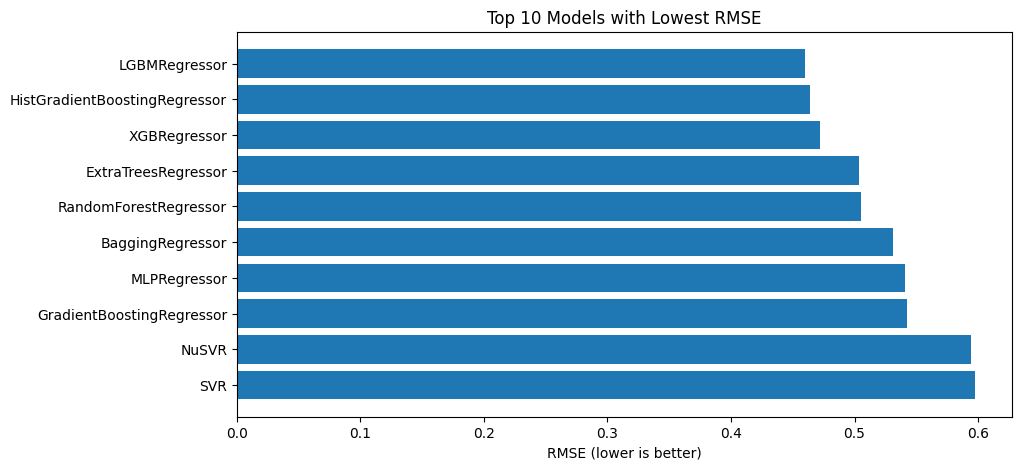

In [14]:
import matplotlib.pyplot as plt

# เรียงตาม RMSE จากน้อย → มาก
models_sorted_rmse = models.sort_values(by="RMSE", ascending=True).head(10)

# วาดกราฟ RMSE
plt.figure(figsize=(10,5))
plt.barh(models_sorted_rmse.index, models_sorted_rmse["RMSE"])
plt.xlabel("RMSE (lower is better)")
plt.title("Top 10 Models with Lowest RMSE")
plt.gca().invert_yaxis()
plt.show()
